### Breakdown of lethality

In [13]:
import pickle
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

#### Read in files

In [14]:
dir_in_res = '../out/20.0216 feat/reg_rf_boruta'
dir_in_anlyz = os.path.join(dir_in_res, 'anlyz_filtered')
df_featSummary = pd.read_csv(os.path.join(dir_in_anlyz, 'feat_summary.csv')) #feature summary
df_featSummary['feat_sources'] = df_featSummary['feat_sources'].apply(literal_eval)
df_featSummary['feat_genes'] = df_featSummary['feat_genes'].apply(literal_eval)

In [15]:
feat_summary_annot_gene = pd.read_csv(os.path.join(dir_in_anlyz, 'onsamegene', 'feat_summary_annot.csv'), header=0, index_col=0)

gs_name = 'paralog'
feat_summary_annot_paralog = pd.read_csv(os.path.join(dir_in_anlyz, f'insame{gs_name}', 'feat_summary_annot.csv'), header=0, index_col=0)

gs_name = 'Panther'
feat_summary_annot_panther = pd.read_csv(os.path.join(dir_in_anlyz, f'insamegeneset{gs_name}', 'feat_summary_annot.csv'), header=0, index_col=0)


#### Breakdown - basic - top most important feature

In [16]:
df_counts = df_featSummary.groupby('feat_source1')['feat_source1'].count()
df_counts = df_counts.to_dict()
df_sl = pd.DataFrame([{'new_syn_lethal':df_counts['CERES'],
                       'classic_syn_lethal': sum([df_counts[k] for k in ['CN','Mut','RNA-seq']]) }])
df_sl = df_sl.T.squeeze()

In [17]:
df_sl

new_syn_lethal        429
classic_syn_lethal     97
Name: 0, dtype: int64

#### Breakdown of lethality, top most important feature

In [18]:
df_src1 = df_featSummary[['target','feat_source1']].set_index('target')
df = pd.DataFrame({'isNotCERES': df_src1.feat_source1.isin(['RNA-seq', 'CN', 'Mut']),
                   'sameGene': feat_summary_annot_gene.inSame_1,
                   'sameParalog': feat_summary_annot_paralog.inSame_1,
                   'sameGS': feat_summary_annot_panther.inSame_1,
                   'isCERES': df_src1.feat_source1 == 'CERES'
                   })

lethal_dict = {'sameGene': 'Same gene',
               'sameParalog': 'Paralog',
               'sameGS': 'Gene set',
               'isCERES': 'Functional',
               'isNotCERES': 'Classic synthetic'}

In [19]:
df_counts = pd.DataFrame({'sum':df.sum(axis=0)})
df_counts['lethality'] = [lethal_dict[n] for n in df_counts.index]

In [20]:
df_counts

,sum,lethality
isNotCERES,97,Classic synthetic
sameGene,12,Same gene
sameParalog,38,Paralog
sameGS,58,Gene set
isCERES,429,Functional


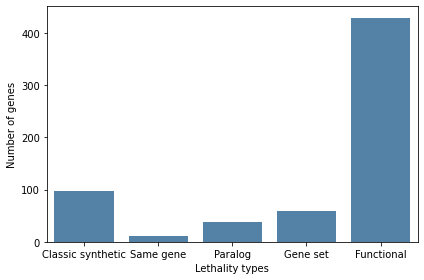

In [21]:
plt.figure()
ax = sns.barplot(df_counts['lethality'], df_counts['sum'], color='steelblue')
ax.set(xlabel='Lethality types', ylabel='Number of genes')
plt.tight_layout()

#### Breakdown of lethality, top 10 most important feature

In [22]:
df_src = df_featSummary.set_index('target').feat_sources
df = pd.DataFrame({'hasNoCERES': df_src.apply(lambda x: any([n in x for n in ['CN','Mut','RNA-seq','Lineage']])),
                   'sameGene': feat_summary_annot_gene.inSame_top10,
                   'sameParalog': feat_summary_annot_paralog.inSame_top10,
                   'sameGS': feat_summary_annot_panther.inSame_top10,
                   'hasCERES': df_src.apply(lambda x: 'CERES' in x)
                   })

lethal_dict = {'sameGene': 'Same gene',
               'sameParalog': 'Paralog',
               'sameGS': 'Gene set',
               'hasCERES': 'Functional',
               'hasNoCERES': 'Classic synthetic'}

In [23]:
df_counts = pd.DataFrame({'sum':df.sum(axis=0)})
df_counts['lethality'] = [lethal_dict[n] for n in df_counts.index]

In [24]:
df_counts

,sum,lethality
hasNoCERES,257,Classic synthetic
sameGene,27,Same gene
sameParalog,60,Paralog
sameGS,82,Gene set
hasCERES,475,Functional


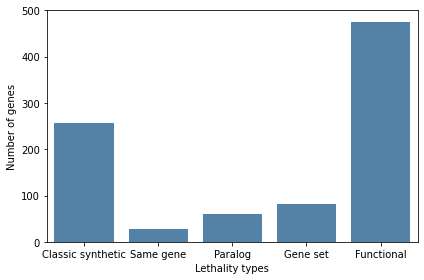

In [25]:
plt.figure()
ax = sns.barplot(df_counts['lethality'], df_counts['sum'], color='steelblue')
ax.set(xlabel='Lethality types', ylabel='Number of genes', ylim=[0,500])
plt.tight_layout()